In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [222]:
raw = requests.get("https://covid19.saglik.gov.tr/covid19api?getir=liste") # api'den veriyi alıyoruz
raw_json = raw.json() # dönen cevap içerisindeki json'u alıyoruz
df = pd.DataFrame(raw_json) # json'dan bir DataFrame oluşturuyoruz

In [223]:
df.head() # veriye bir göz gezdirelim

,tarih,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_test,toplam_vaka,toplam_vefat,toplam_iyilesen,toplam_yogun_bakim,toplam_entube,hastalarda_zaturre_oran,agir_hasta_sayisi,yatak_doluluk_orani,eriskin_yogun_bakim_doluluk_orani,ventilator_doluluk_orani,ortalama_filyasyon_suresi,ortalama_temasli_tespit_suresi,filyasyon_orani
0,01.10.2020,113.546,1.407,67,1.402,10.493.807,320.070,8.262,281.151,,,6.4,1.507,49.3,67.1,32.3,,8,99.1
1,30.09.2020,112.098,1.391,65,1.245,10.380.261,318.663,8.195,279.749,,,6.4,1.516,,,,,,
2,29.09.2020,114.940,1.427,68,1.452,10.268.163,317.272,8.130,278.504,,,6.5,1.583,,,,,,
3,28.09.2020,115.523,1.412,65,1.422,10.153.223,315.845,8.062,277.052,,,6.5,1.596,,,,,,
4,27.09.2020,101.119,1.467,68,1.116,10.037.700,314.433,7.997,275.630,,,6.5,1.583,,,,,,


In [224]:
df.info() # veri seti hakkında bilgi sahibi olalım

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   tarih                              204 non-null    object
 1   gunluk_test                        204 non-null    object
 2   gunluk_vaka                        204 non-null    object
 3   gunluk_vefat                       204 non-null    object
 4   gunluk_iyilesen                    204 non-null    object
 5   toplam_test                        204 non-null    object
 6   toplam_vaka                        204 non-null    object
 7   toplam_vefat                       204 non-null    object
 8   toplam_iyilesen                    204 non-null    object
 9   toplam_yogun_bakim                 204 non-null    object
 10  toplam_entube                      204 non-null    object
 11  hastalarda_zaturre_oran            204 non-null    object
 12  agir_has

In [225]:
cols = df.columns.tolist() # veri setine ait kolonları bir listeye atıyoruz
cols.insert(1, cols.pop(cols.index('hastalarda_zaturre_oran'))) # bunu 2 satır aşağısı için yapıyoruz. Bu kolonu 2. sıraya çekeceğiz bu sayede aşağıda tip dönüşümleri yaparken takılmayacağız
df = df.reindex(columns=cols) # veri setini yeniden indexliyoruz (kolon sırasını değiştiriyoruz)

In [226]:
df['toplam_vaka'] = df['toplam_vaka'].apply(lambda x: str(f'{x}')).astype('string')
# toplam_vaka kolonunun veri tipini string olarak güncelliyoruz

In [227]:
for col_name in df.loc[:,'gunluk_test':].columns: # tüm satırları al VE gunluk_test kolonundan (dahil) son kolona kadar (dahil)
    df[f'{col_name}'] = df[f'{col_name}'].str.replace('.','').astype('string') # kolondaki değerleri formatla ve veri tipini string'e çevir
    df[f'{col_name}'] = pd.to_numeric(df[f'{col_name}']) # sayısal veri tipine dönüştürüyoruz 

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   tarih                              204 non-null    object 
 1   hastalarda_zaturre_oran            204 non-null    object 
 2   gunluk_test                        188 non-null    float64
 3   gunluk_vaka                        188 non-null    float64
 4   gunluk_vefat                       188 non-null    float64
 5   gunluk_iyilesen                    180 non-null    float64
 6   toplam_test                        188 non-null    float64
 7   toplam_vaka                        204 non-null    int64  
 8   toplam_vefat                       198 non-null    float64
 9   toplam_iyilesen                    188 non-null    float64
 10  toplam_yogun_bakim                 123 non-null    float64
 11  toplam_entube                      123 non-null    float64

In [229]:
df.isna().any() # evet veri tipini sayısal'a çevirince aralarda NaN değerler oldu

tarih                                False
hastalarda_zaturre_oran              False
gunluk_test                           True
gunluk_vaka                           True
gunluk_vefat                          True
gunluk_iyilesen                       True
toplam_test                           True
toplam_vaka                          False
toplam_vefat                          True
toplam_iyilesen                       True
toplam_yogun_bakim                    True
toplam_entube                         True
agir_hasta_sayisi                     True
yatak_doluluk_orani                   True
eriskin_yogun_bakim_doluluk_orani     True
ventilator_doluluk_orani              True
ortalama_filyasyon_suresi             True
ortalama_temasli_tespit_suresi        True
filyasyon_orani                       True
dtype: bool

In [230]:
df.fillna(0,inplace=True) # NaN değerleri 0 olarak atamamızda bir sakınca yok, sonuçta bunlar o gün hiç hasta olmadığını belirtiyor. 0 atarsak mantıksal bir hata yapmış olmayız

In [231]:
for col_name in df.loc[:,'gunluk_test':].columns:  # tekrar int'e çevirmek istediğimiz tüm kolonları geziyoruz
    df[f'{col_name}'] = df[f'{col_name}'].astype('int') # veri tiplerini int'e çeviriyoruz ve mevcut kolon ile değiştiriyoruz

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   tarih                              204 non-null    object
 1   hastalarda_zaturre_oran            204 non-null    object
 2   gunluk_test                        204 non-null    int64 
 3   gunluk_vaka                        204 non-null    int64 
 4   gunluk_vefat                       204 non-null    int64 
 5   gunluk_iyilesen                    204 non-null    int64 
 6   toplam_test                        204 non-null    int64 
 7   toplam_vaka                        204 non-null    int64 
 8   toplam_vefat                       204 non-null    int64 
 9   toplam_iyilesen                    204 non-null    int64 
 10  toplam_yogun_bakim                 204 non-null    int64 
 11  toplam_entube                      204 non-null    int64 
 12  agir_has

In [233]:
df['hastalarda_zaturre_oran'] = df['hastalarda_zaturre_oran'].str.replace(',','.') # bu kolonu float yapmamız gerekmekte fakat ondalık kısımda '.' yerine  ',' olduğu için hata alacağız. Bu sebeple önce ','leri '.' ile replace ediyoruz

In [234]:
df['hastalarda_zaturre_oran'] = pd.to_numeric(df['hastalarda_zaturre_oran']) # ardından sütunu sayısal'a çeviriyoruz

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   tarih                              204 non-null    object 
 1   hastalarda_zaturre_oran            65 non-null     float64
 2   gunluk_test                        204 non-null    int64  
 3   gunluk_vaka                        204 non-null    int64  
 4   gunluk_vefat                       204 non-null    int64  
 5   gunluk_iyilesen                    204 non-null    int64  
 6   toplam_test                        204 non-null    int64  
 7   toplam_vaka                        204 non-null    int64  
 8   toplam_vefat                       204 non-null    int64  
 9   toplam_iyilesen                    204 non-null    int64  
 10  toplam_yogun_bakim                 204 non-null    int64  
 11  toplam_entube                      204 non-null    int64  

In [236]:
df['tarih'] = pd.to_datetime(df['tarih'],format='%d.%m.%Y') 
# tarih sütunumuzu da DateTime tip olarak güncelliyoruz. Format tipini belirtiyoruz. Pandas kendi datetime'ına çevirmeden önce bizim tarihimizin hangi yapıda olduğunu merak ediyor, 'gün.ay.yıl' olarak set ediyoruz

In [237]:
df.info() # artık chart çıkartmak için hazırız ^^

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   tarih                              204 non-null    datetime64[ns]
 1   hastalarda_zaturre_oran            65 non-null     float64       
 2   gunluk_test                        204 non-null    int64         
 3   gunluk_vaka                        204 non-null    int64         
 4   gunluk_vefat                       204 non-null    int64         
 5   gunluk_iyilesen                    204 non-null    int64         
 6   toplam_test                        204 non-null    int64         
 7   toplam_vaka                        204 non-null    int64         
 8   toplam_vefat                       204 non-null    int64         
 9   toplam_iyilesen                    204 non-null    int64         
 10  toplam_yogun_bakim                 204

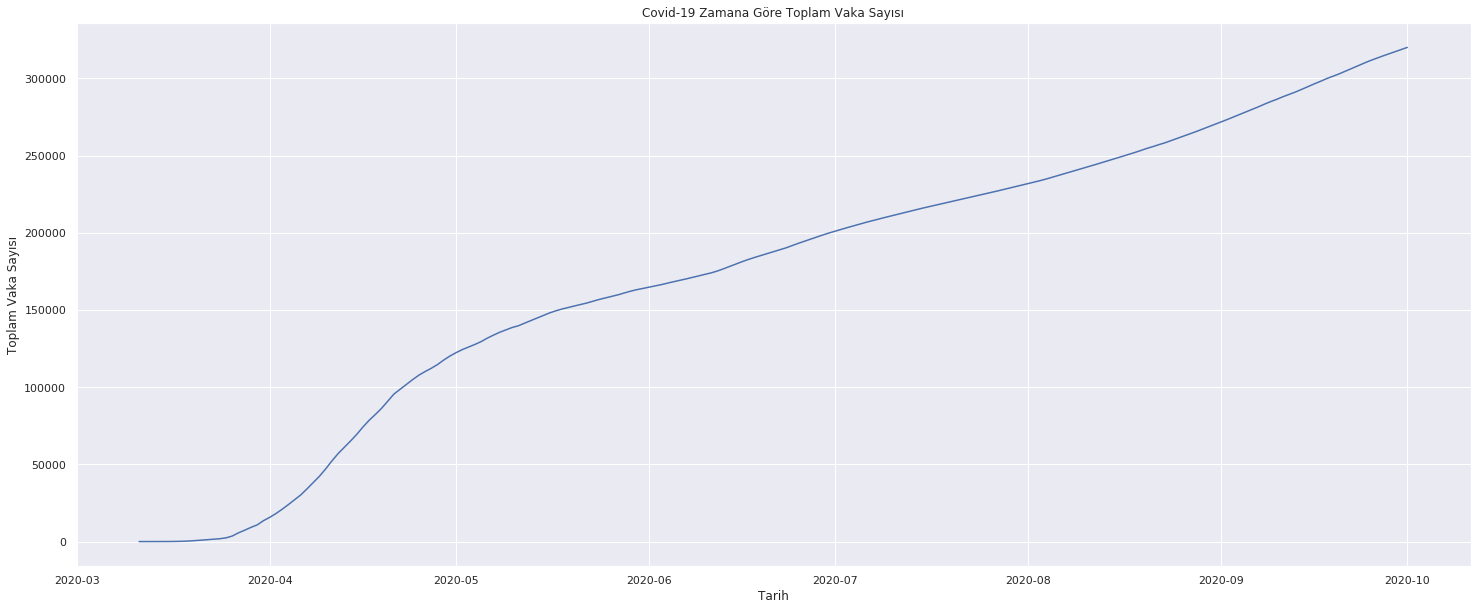

In [263]:
sns.lineplot(x='tarih',y='toplam_vaka',data=df)
sns.set(rc={'figure.figsize':(25,10)},style='darkgrid')
plt.xlabel('Tarih')
plt.ylabel('Toplam Vaka Sayısı')
plt.title('Covid-19 Zamana Göre Toplam Vaka Sayısı')
plt.show()